https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

# %config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

train.head()
#print('_'*80)
#test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
all_data = pd.concat((train.loc[:,'Pclass':'Embarked'],
                      test.loc[:,'Pclass':'Embarked']))

#all_data.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C564B0A748>,
      dtype=object)

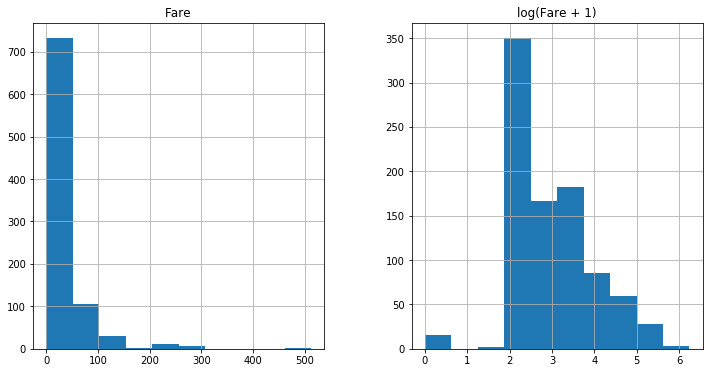

In [3]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Fare":train["Fare"], "log(Fare + 1)":np.log1p(train["Fare"])})
prices.hist()

In [4]:
#log transform the target:
#train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log(all_data[skewed_feats]+1)

In [5]:
all_data = pd.get_dummies(all_data)

In [6]:
all_data = all_data.fillna(all_data.mean())

In [7]:
train.shape

(891, 11)

In [8]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.Survived
#print(y)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.metrics import confusion_matrix

In [32]:
logreg.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [26]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y)

# accuracy = round(logreg.score(X_train, y) * 100, 2)

# print(accuracy)

logreg_preds = logreg.predict(X_test)
logreg_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [12]:
logreg_preds_train = logreg.predict(X_train)

In [13]:
yhat_matrix = confusion_matrix(y, logreg_preds_train)
yhat_matrix

array([[516,  33],
       [ 64, 278]], dtype=int64)

In [58]:
y[:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [60]:
prob = logreg.predict_proba(X_train)

df_prob = pd.DataFrame(prob, columns=['prob_morrer', 'prob_viver'])

df_prob = pd.concat([df_prob.reset_index(),
                     pd.DataFrame(y).reset_index(),
                     pd.DataFrame(logreg_preds_train, columns=['predito']).reset_index()],
                    axis=1)

df_prob = df_prob.rename({'Survived': 'Real'}, axis=1)
del df_prob['index']
df_prob.head()

,prob_morrer,prob_viver,Real,predito
0,0.929442,0.070558,0,0
1,0.067197,0.932803,1,1
2,0.315709,0.684291,1,1
3,0.139597,0.860403,1,1
4,0.932044,0.067956,0,0


In [63]:
df_prob[df_prob.Real==1].sort_values(by=['prob_viver']).head()

,prob_morrer,prob_viver,Real,predito
271,0.914230,0.085770,1,0
338,0.883405,0.116595,1,0
414,0.880568,0.119432,1,0
400,0.862629,0.137371,1,0
570,0.852580,0.147420,1,0


In [20]:
logreg.predict_proba(X_train)[:10,1]

array([0.07055841, 0.93280298, 0.68429086, 0.86040317, 0.06795557,
       0.10775505, 0.21077585, 0.04502981, 0.79271466, 0.89006178])

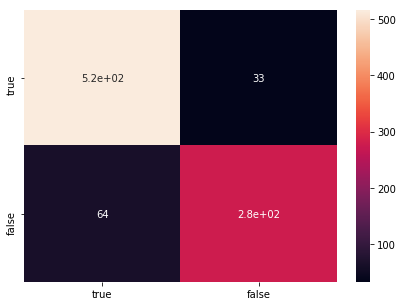

In [16]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(yhat_matrix, index = [i for i in ['true','false']],
                  columns = [i for i in ['true','false']])

plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True)

In [68]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score

In [69]:
import matplotlib.pyplot as plt

In [72]:
def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (area = %0.6f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()
    
fpr, tpr, _ = roc_curve(y, df_prob['prob_viver'])
roc_auc = auc(fpr, tpr)

No handles with labels found to put in legend.


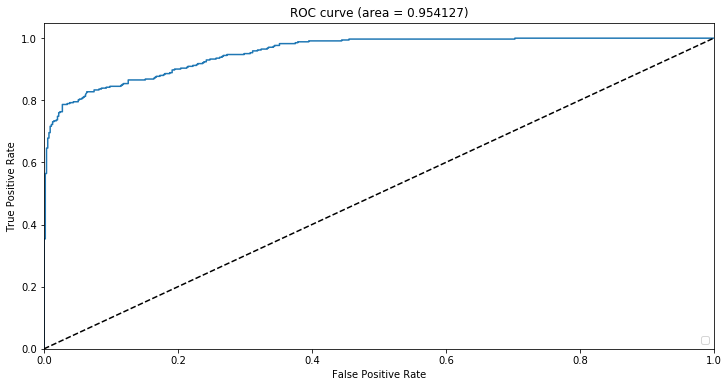

In [73]:
plot_roc(fpr, tpr, roc_auc)

In [74]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y)

random_forest_preds = random_forest.predict(X_test)

random_forest.score(X_train, y)
accuracy = round(random_forest.score(X_train, y) * 100, 2)
print(accuracy)

99.89


In [37]:
random_forest.predict_proba(X_train)[:10]

array([[0.96, 0.04],
       [0.01, 0.99],
       [0.23, 0.77],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.92, 0.08],
       [0.16, 0.84],
       [0.05, 0.95]])

In [75]:
#Random forest submission
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                         "Survived":random_forest_preds})

solution.to_csv("random_forest_solution.csv", index = False)

In [76]:
solution

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
